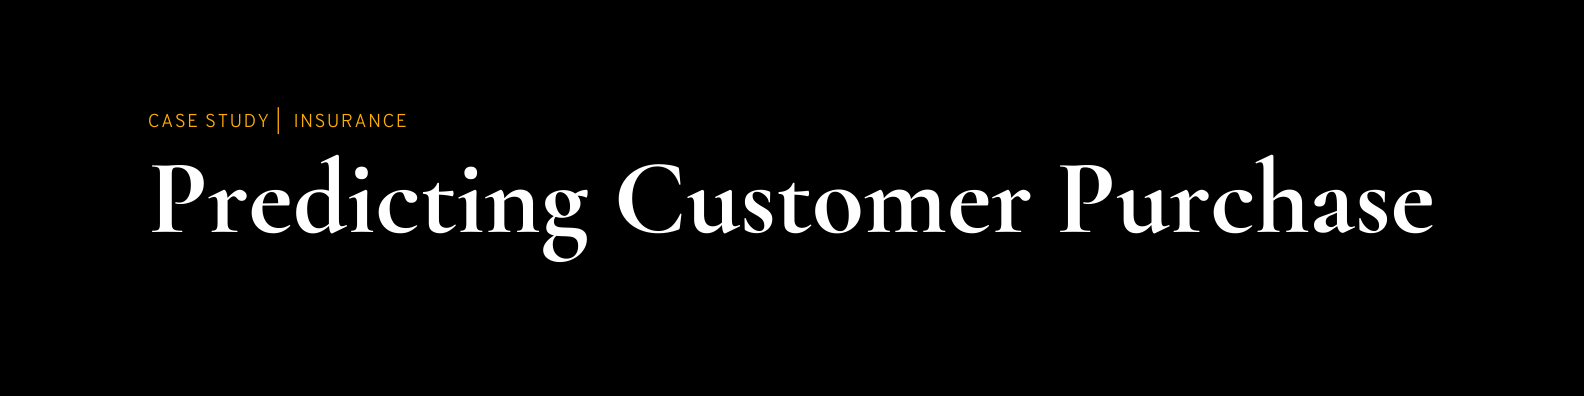
###### To see more case studies, view my machine learning portfolio [here](https://github.com/rgoubault/machine-learning-portfolio).

###### Author: Rainier Goubault |  [LinkedIn](https://www.linkedin.com/in/rainiergoubault/)

# Business Objective:

An insurance company, hereby known as InsuranceCo., provided select, customer data related to direct marketing campaigns. We are provided with general demographic information about customers, information about previous and current campaigns and an indicator as to whether or not a customer purchased car insurance when contacted. 

InsuranceCo. organizes regular marketing camapigns to attract new clients with employees calling customers for advertising available car insurance options. With a large customer database, the process of calling customers has become a tedious one for InsuranceCo. employees and they are seeking a solution, as a part of their marketing campaign strategy, that will be able to help identify customers who are mostly likely to purchase car insurance when contacted. 

InsuranceCo. have contracted me on a project to build a predictive a model that meets the following requirements: 

    1. Identify and visualize which factors contribute to customer purchasing car insurance.
    2. Build a prediction model that will classify if a customer is going to purchase, in this case, whether 
       customers will purchase car insurance or not, thus making it easier for InsuranceCo. employees to target 
       customers that's most likely to purchase as a part of its marketing promotional campaigns.



# Executive Summary:

After analyzing and transforming the data, we optimized several classification models. Each model was trained on 80% of the historical data and then asked to predict churn scores on the remaining 20% test data. Each model was compared with the previous best model, with History Gradient Boosting model performing the best.


**Target Variable:**

    - 'CarInsurance'

**Model:**
    
    - History Gradient Boosting 

**Model Parameters:**

    - 'max_iter': 600, 
    - 'max_depth': 3, 
    - 'learning_rate': 0.03

**Model Key Metrics:**

    - Mean CV ROC-AUC score: 92.52%
    - ROC-AUC test score: 82.61%
    - Accuracy test score: 83.01%
    - Precision test score: 78.19%
    - Recall test score: 80.35%
    - F1 test score: 79.25%

# Gather The Data

###### The data used  was sourced from [here](https://www.kaggle.com/kondla/carinsurance)

### Load Libraries

In [1]:
# Warning
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np 
import pandas as pd

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import mannwhitneyu

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

import plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from plotly.offline import iplot
from plotly.subplots import make_subplots


# Preprocessing 
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder

# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

# Metrics
from sklearn.metrics import average_precision_score, f1_score, accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, roc_curve, plot_roc_curve, make_scorer

# Set visualiation options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style('white')

import plotly.io as pio
pio.renderers.default = 'notebook_connected'

cf.go_offline()

# Set notebook options
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 100) # display 100 rows

# Set pipeline display options
from sklearn import set_config
set_config(display='diagram')
set_config(print_changed_only=False)

%load_ext watermark

# Check the version history of libraries imported
print('\nAll librarires have been loaded!')
print('\nLibraries Version History:\n')
%watermark -iv


All librarires have been loaded!

Libraries Version History:

cufflinks : 0.17.3
pandas    : 1.3.4
seaborn   : 0.11.2
sklearn   : 1.0.1
json      : 2.0.9
scipy     : 1.7.3
matplotlib: 3.5.0
numpy     : 1.19.5
plotly    : 5.4.0



###### Now that we have imported our libraries and checked their version history it is time to import the data.

### Import Data

In [2]:
raw_data = pd.read_csv('../02-data/customer-purchase-insurance-train.csv')
data = raw_data.copy()
print('\nThe data has been successfully imported!')


The data has been successfully imported!


# Exploratory Data Analysis and Visualization

###### Let's examine the data.

In [3]:
data.head()

Id  Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   1   32   management   single  tertiary        0     1218            1   
1   2   32  blue-collar  married   primary        0     1156            1   
2   3   29   management   single  tertiary        0      637            1   
3   4   25      student   single   primary        0      373            1   
4   5   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  CarInsurance  
0          -1             0      NaN  13:45:20  13:46:30             0  
1          -1             0      NaN  14:49:03  14:52:08             0  
2         119             1  failure  16:30:24  16:36:04             1  
3          -1             0      NaN  12:06:43  12:20:22             1  
4          -1             0      NaN  14:35:44  14:38:56             0

###### Let's check the data types and for null (missing) values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

     - The data contains 4,000 entries (i.e. rows). Each entry represents a unique customer.
     - The data contains 19 features (i.e. columns). Each feature represents a attribute about the customer.
     - The data contains null (missing) values. We'll explore this later.
     - The data contains 11 numerical features and 8 categorical features.
     - 'CarInsurance' feature is the target variable, indicating whether a customer purchase car insurance or not.

### Feature Description

###### Below is an decription overview of the features in the data.

    - 'Id': Unique ID number to identify customers
    - 'Age': Customer age
    - 'Job': Customer job 
    - 'Marital': Customers marital status
    - 'Education': Customer education level
    - 'Default': Has the customer have credit in defualt? 
    - 'Balance': Customer average yearly balance, in USD
    - 'HHInsurance': Is customer household insured?
    - 'CarLoan': Has the customer a car loan?
    - 'Communication': Customer contact communication type
    - 'LastContactMonth': Month of the last customer contact
    - 'LastContactDay': Day of the last customer contact
    - 'NoOfContacts': Number of contacts performed during this campaign for this customer
    - 'DaysPassed': Number of days that passed by after the customer was last contacted from a previous 
       campaign (-1 means not previously contacted)
    - 'PrevAttempts': Number of contacts performed before this campaign and for this customer
    - 'Outcome': Outcome of the previous marketing campaign
    - 'CallStart': Start time of the last customer call 
    - 'CallEnd': End time of the last customer call
    - 'CarInsurance': Whether customer purchased car insurance or not. The target variable.

In [5]:
data.columns = data.columns.str.lower()

### Duplicates

###### First, we'll start off checking the data for duplicate values.

In [6]:
dups = data[data.duplicated(subset=['id'])==True]
print(f'\n{dups.shape[0]} duplicate values found')


0 duplicate values found


### Constants and Uniques

###### Now, we'll examine the data for constant and unique values.

In [7]:
constants = data.nunique()
constants = [i for i,v in enumerate(constants) if v ==1]
constants

[]

    - The data does not contain any constant values.

###### Let's examine the unique values for numerical features.

In [8]:
for feature in data.select_dtypes(include='number').columns:
    print(f'{feature} feature has {data[feature].nunique()} unique values.')

id feature has 4000 unique values.
age feature has 70 unique values.
default feature has 2 unique values.
balance feature has 2178 unique values.
hhinsurance feature has 2 unique values.
carloan feature has 2 unique values.
lastcontactday feature has 31 unique values.
noofcontacts feature has 35 unique values.
dayspassed feature has 330 unique values.
prevattempts feature has 20 unique values.
carinsurance feature has 2 unique values.


    -'id': contains all unique values, which is a specific unique id to each customer. This feature is irrelevant 
      and will be dropped from the data.
    -'default', 'hhinsurance' and 'carloan': are binary categorical features (i.e. unique value = 2) that were 
      encoded to numerical values. 
    - 'lastcontactday': can also be considered a categorical feature that was encoded to numerical values (i.e. 
      31 unique values with each value representing a day in the month). 
    - 'carinsurance': Is also a binary feature that was encoded to numerical values.

###### Let's drop the irrelevant feature from the data.

In [9]:
data.drop('id', axis=1, inplace=True)
print(f'\nThe irrelevant features were dropped from the data!')


The irrelevant features were dropped from the data!


###### Above we saw that a few numerical features are binary categorical features. We'll convert them to the appropiate categorical data type.

In [10]:
feats_dtypes_to_convert  = ['default', 'hhinsurance', 'carloan', 'lastcontactday']

for feature in feats_dtypes_to_convert:
    data[feature] = data[feature].astype('object')

###### Let's examine the unique values for categorical features.

In [11]:
for feature in data.select_dtypes(include='object').columns:
    print(f'{feature} feature has {data[feature].nunique()} unique values.')

job feature has 11 unique values.
marital feature has 3 unique values.
education feature has 3 unique values.
default feature has 2 unique values.
hhinsurance feature has 2 unique values.
carloan feature has 2 unique values.
communication feature has 2 unique values.
lastcontactday feature has 31 unique values.
lastcontactmonth feature has 12 unique values.
outcome feature has 3 unique values.
callstart feature has 3777 unique values.
callend feature has 3764 unique values.


    - Categorical features has low cardinality (i.e. # of unique values are low). 
    - 'callStart and 'callend' are date/time features and will need to be converted to appropiate dtype.

###### Let's convert the date/time features to the appropiate categorical data type.

In [12]:
feats_to_datetime = ['callstart', 'callend']

for feature in feats_to_datetime:
    data[feature] = pd.to_datetime(data[feature])

### Missing Values

###### Up next, we will explore the null (missing) values in the data.

In [13]:
data.isna().sum()

age                    0
job                   19
marital                0
education            169
default                0
balance                0
hhinsurance            0
carloan                0
communication        902
lastcontactday         0
lastcontactmonth       0
noofcontacts           0
dayspassed             0
prevattempts           0
outcome             3042
callstart              0
callend                0
carinsurance           0
dtype: int64

In [14]:
def missing_data(data):
    # Get missing values
    missing = data.isna()
    # Calcualte the total number of missing values
    total_missing = missing.sum().sort_values(ascending=False)
    # Calculate the percentage of missing values
    percent_missing = 100 * (total_missing / missing.count()).sort_values(ascending=False)
    # Combine results into dataframe
    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])
    
    return missing_data

missing = missing_data(data)
missing

Total Missing  Percent Missing
outcome                    3042           76.050
communication               902           22.550
education                   169            4.225
job                          19            0.475
age                           0            0.000
noofcontacts                  0            0.000
callend                       0            0.000
callstart                     0            0.000
prevattempts                  0            0.000
dayspassed                    0            0.000
lastcontactday                0            0.000
lastcontactmonth              0            0.000
carloan                       0            0.000
hhinsurance                   0            0.000
balance                       0            0.000
default                       0            0.000
marital                       0            0.000
carinsurance                  0            0.000

In [15]:
px.bar(missing, x=missing.index, y=missing['Percent Missing'],
       title='<b> Percentage of Missing Data by Feature<b>')

    - The data contains null (missing) values.
    - 'job', 'education', 'communication' and 'outcome' features contain missing values.
    - 'outcome' contains the most null values with 3042 (76.050% of its distribution) missing values.
    - 'communication' contains 902 (22.550% of its distribution) missing values.
    - 'education' contains 169 (4.225% of its distribution) missing values.
    - 'job'** contains  the least null values with 19 (0.475% of its distribution) missing values.

###### Let's examine why these features are missing values.

In [16]:
job_missing = data[data['job'].isna()]
job_missing.head()

age  job   marital  education default  balance hhinsurance carloan  \
27    45  NaN  divorced        NaN       0        0           0       0   
239   41  NaN    single        NaN       0      942           0       0   
486   54  NaN   married    primary       0      981           0       0   
536   33  NaN    single  secondary       0     1522           0       1   
605   53  NaN   married    primary       0      732           0       0   

    communication lastcontactday lastcontactmonth  noofcontacts  dayspassed  \
27       cellular             21              apr             3          -1   
239      cellular             27              oct             1         188   
486      cellular             22              aug            12          -1   
536      cellular             19              nov             1          -1   
605      cellular             27              oct             2          -1   

     prevattempts  outcome           callstart             callend  \
27              0      NaN 2021-12-17 12:33:22 2021-12-17 12:38:00   
239             1  success 2021-12-17 16:39:43 2021-12-17 16:42:06   
486             0      NaN 2021-12-17 11:31:36 2021-12-17 11:42:27   
536             0      NaN 2021-12-17 12:44:40 2021-12-17 13:00:46   
605             0      NaN 2021-12-17 09:01:01 2021-12-17 09:13:40   

     carinsurance  
27              1  
239             1  
486             0  
536             0  
605             1

In [17]:
education_missing = data[data['education'].isna()]
education_missing.head()

age         job   marital education default  balance hhinsurance carloan  \
14   25    services    single       NaN       0     2022           0       0   
27   45         NaN  divorced       NaN       0        0           0       0   
50   54    services  divorced       NaN       0        0           1       0   
53   78     retired   married       NaN       0     3208           0       0   
58   34  management    single       NaN       0     6013           1       0   

   communication lastcontactday lastcontactmonth  noofcontacts  dayspassed  \
14      cellular             29              jul             8          97   
27      cellular             21              apr             3          -1   
50      cellular             16              apr             1          -1   
53     telephone             20              may             3          -1   
58      cellular             18              may             1          -1   

    prevattempts outcome           callstart             callend  carinsurance  
14            12   other 2021-12-17 14:15:09 2021-12-17 14:19:45             1  
27             0     NaN 2021-12-17 12:33:22 2021-12-17 12:38:00             1  
50             0     NaN 2021-12-17 16:18:17 2021-12-17 16:22:40             0  
53             0     NaN 2021-12-17 16:00:27 2021-12-17 16:06:18             1  
58             0     NaN 2021-12-17 13:52:00 2021-12-17 14:02:12             1

In [18]:
communication_missing = data[data['communication'].isna()]
communication_missing.head()

age            job   marital  education default  balance hhinsurance  \
1    32    blue-collar   married    primary       0     1156           1   
7    35     management  divorced   tertiary       0      538           1   
13   38  self-employed  divorced  secondary       0     2674           1   
20   57    blue-collar   married  secondary       0      773           1   
28   34       services   married  secondary       0      -62           1   

   carloan communication lastcontactday lastcontactmonth  noofcontacts  \
1        0           NaN             26              may             5   
7        0           NaN             12              may             4   
13       0           NaN             19              jun             2   
20       1           NaN             18              jun             8   
28       0           NaN             16              jun             3   

    dayspassed  prevattempts outcome           callstart             callend  \
1           -1             0     NaN 2021-12-17 14:49:03 2021-12-17 14:52:08   
7           -1             0     NaN 2021-12-17 15:39:43 2021-12-17 15:40:49   
13          -1             0     NaN 2021-12-17 10:29:56 2021-12-17 10:32:39   
20          -1             0     NaN 2021-12-17 09:05:50 2021-12-17 09:07:27   
28          -1             0     NaN 2021-12-17 13:50:40 2021-12-17 13:52:29   

    carinsurance  
1              0  
7              0  
13             0  
20             0  
28             0

In [19]:
outcome_missing = data[data['outcome'].isna()]
outcome_missing.head()

age          job  marital education default  balance hhinsurance carloan  \
0   32   management   single  tertiary       0     1218           1       0   
1   32  blue-collar  married   primary       0     1156           1       0   
3   25      student   single   primary       0      373           1       0   
4   30   management  married  tertiary       0     2694           0       0   
6   37       admin.   single  tertiary       0     1000           1       0   

  communication lastcontactday lastcontactmonth  noofcontacts  dayspassed  \
0     telephone             28              jan             2          -1   
1           NaN             26              may             5          -1   
3      cellular             11              may             2          -1   
4      cellular              3              jun             1          -1   
6      cellular             17              mar             1          -1   

   prevattempts outcome           callstart             callend  carinsurance  
0             0     NaN 2021-12-17 13:45:20 2021-12-17 13:46:30             0  
1             0     NaN 2021-12-17 14:49:03 2021-12-17 14:52:08             0  
3             0     NaN 2021-12-17 12:06:43 2021-12-17 12:20:22             1  
4             0     NaN 2021-12-17 14:35:44 2021-12-17 14:38:56             0  
6             0     NaN 2021-12-17 13:00:02 2021-12-17 13:03:17             1

    - 'job' and 'education': The null values are because customers didn't specify this information.
    - 'communication': The null values are because InsuranceCo. forgot to specify this information.
    - 'outcome': The null values are because some customers haven't been offered anything before, so there is 
       no outcome to report.

### Target Feature

###### The target feature is  'carinsurance', we'll examine it.

In [20]:
target = data['carinsurance'].to_frame()

In [21]:
target.count()

carinsurance    4000
dtype: int64

In [22]:
target_vcounts = data['carinsurance'].value_counts().to_frame()
target_vcounts

carinsurance
0          2396
1          1604

###### Most customers (2,396), as denoted by '0' did not purchase car insurance when contacted, while 1,604 customers did purchase car insurance.

In [23]:
target.iplot(kind='hist', bargap=0.1, title='Car Insurance Purchase Distribution')

###### So 60% of customers did not purchase car insurance when contacted.

In [24]:
names = ['Not Purchased', 'Purchased']
fig = px.pie(target_vcounts, names=names, values='carinsurance', 
             title='<b>Car Insurance Purchase Distribution<b>')
fig

## Numerical Features

In [25]:
# Get numerical features
num = data.drop('carinsurance', axis=1).select_dtypes(include='number').columns

In [26]:
# Let's look at numerical features
data[num].head()

age  balance  noofcontacts  dayspassed  prevattempts
0   32     1218             2          -1             0
1   32     1156             5          -1             0
2   29      637             1         119             1
3   25      373             2          -1             0
4   30     2694             1          -1             0

In [27]:
data[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           4000 non-null   int64
 1   balance       4000 non-null   int64
 2   noofcontacts  4000 non-null   int64
 3   dayspassed    4000 non-null   int64
 4   prevattempts  4000 non-null   int64
dtypes: int64(5)
memory usage: 156.4 KB


### Numerical Features Univariate Analysis

###### Distribution

In [28]:
data[num].iplot(kind='histogram', subplots=True, bins=50, dimensions=(1000, 1000),
                title='<b>Histogram Distribution of Numerical Features<b>')

In [29]:
for feature in data[num]:
    data[feature].iplot(kind='hist', bins=50, 
                        title=f'<b>Histogram Distribution of {feature}<b>') 

In [30]:
data[num].iplot(kind='box', subplots=True, bins=10, boxpoints='all', dimensions=(1000, 1000),
                title='<b>Boxplot Distribution of Numerical Features<b>')

In [31]:
for feature in data[num]:
    data[feature].iplot(kind='box', boxpoints='all',
                        title=f'<b>Boxplot Distribution of {feature}<b>')

###### Statistical Summary

In [32]:
data[num].describe().T.style.background_gradient(subset=['count', 'mean','std','50%'], cmap='RdPu').format('{:.2f}')

### Summary of Numerical Features Univariate Analysis

    - The data contains 5 numerical features.
    - Numerical features are not missing values (i.e count = 4000, which is the sum of the entries).
    - Numerical features have varying scales of magnitude (i.e. min / max). 
    - All numerical features appear to have right skew (i.e. the mean is greater than the median (50%).
    - Some values seem suspicious and maybe outliers:
        - max 'age' = 95 years old. We have a real survivor here.
        - max 'balance' = 98,417, when the mean = 1,532 and 75% = 1,619. This person is very rich.
        - min 'balance' = -3,058. Did this person spend all the credit money and didn't pay it back?
        - max 'noofcontact' = 43, when the mean = 2.61 and 75% = 3. Did you bank really contact someone 43 times?
        - max 'dayspassed' = 854. Did the bank not contact someone for 854 days, almost 3 years?
        - max 'prevattempts' = 58, when the mean is 0.72?

###### Let's explore these suspicious values

In [33]:
data[data['age']==95]

age      job   marital education default  balance hhinsurance carloan  \
3837   95  retired  divorced   primary       0     2282           0       0   

     communication lastcontactday lastcontactmonth  noofcontacts  dayspassed  \
3837     telephone             21              apr            17          -1   

      prevattempts outcome           callstart             callend  \
3837             0     NaN 2021-12-17 16:56:10 2021-12-17 16:59:37   

      carinsurance  
3837             1

In [34]:
data[data['balance']==98417]

age         job  marital education default  balance hhinsurance carloan  \
1742   59  management  married  tertiary       0    98417           0       0   

     communication lastcontactday lastcontactmonth  noofcontacts  dayspassed  \
1742     telephone             20              nov             5          -1   

      prevattempts outcome           callstart             callend  \
1742             0     NaN 2021-12-17 10:51:42 2021-12-17 10:54:07   

      carinsurance  
1742             0

In [35]:
data[data['balance']==-3058]

age            job  marital education default  balance hhinsurance  \
3464   39  self-employed  married  tertiary       0    -3058           1   

     carloan communication lastcontactday lastcontactmonth  noofcontacts  \
3464       1      cellular             17              apr             3   

      dayspassed  prevattempts outcome           callstart  \
3464          -1             0     NaN 2021-12-17 13:49:18   

                 callend  carinsurance  
3464 2021-12-17 14:04:00             1

###### Let's check to see how many more customers carry a negative yearly balance. 

In [36]:
neg_balance = (data['balance'] < 0)
print(f'\nThe # of customers with a negative average yearly balance: {neg_balance.sum()}')


The # of customers with a negative average yearly balance: 265


In [37]:
# Let's look at the customers with a negtive average yearly balance
data[neg_balance].head()

age          job  marital  education default  balance hhinsurance carloan  \
11   53  blue-collar  married    primary       1     -462           0       0   
28   34     services  married  secondary       0      -62           1       0   
63   60     services  married  secondary       0      -46           0       0   
86   40  blue-collar  married  secondary       1      -94           1       1   
91   33  blue-collar   single  secondary       0     -147           1       0   

   communication lastcontactday lastcontactmonth  noofcontacts  dayspassed  \
11      cellular             29              jan             1          -1   
28           NaN             16              jun             3          -1   
63           NaN             23              may             2          -1   
86           NaN              7              may             1          -1   
91           NaN             30              may             2          -1   

    prevattempts outcome           callstart             callend  carinsurance  
11             0     NaN 2021-12-17 16:45:50 2021-12-17 16:53:40             1  
28             0     NaN 2021-12-17 13:50:40 2021-12-17 13:52:29             0  
63             0     NaN 2021-12-17 16:36:39 2021-12-17 16:38:51             0  
86             0     NaN 2021-12-17 11:24:19 2021-12-17 11:28:06             0  
91             0     NaN 2021-12-17 16:00:27 2021-12-17 16:11:19             0

In [38]:
data[data['noofcontacts']==43]

age          job  marital  education default  balance hhinsurance  \
3168   33  blue-collar  married  secondary       0        0           1   

     carloan communication lastcontactday lastcontactmonth  noofcontacts  \
3168       1      cellular             31              jul            43   

      dayspassed  prevattempts outcome           callstart  \
3168          -1             0     NaN 2021-12-17 17:56:12   

                 callend  carinsurance  
3168 2021-12-17 17:56:28             0

In [39]:
data[data['dayspassed']==854]

age         job   marital education default  balance hhinsurance  \
3590   37  management  divorced  tertiary       0      488           1   

     carloan communication lastcontactday lastcontactmonth  noofcontacts  \
3590       0      cellular             17              sep             1   

      dayspassed  prevattempts  outcome           callstart  \
3590         854             2  failure 2021-12-17 10:43:12   

                 callend  carinsurance  
3590 2021-12-17 10:48:40             1

In [40]:
data[data['prevattempts']==58]

age          job  marital education default  balance hhinsurance  \
2354   46  blue-collar  married   primary       0     1085           1   

     carloan communication lastcontactday lastcontactmonth  noofcontacts  \
2354       1      cellular             15              may             2   

      dayspassed  prevattempts outcome           callstart  \
2354         353            58   other 2021-12-17 15:05:29   

                 callend  carinsurance  
2354 2021-12-17 15:14:12             1

    - Looking at this data it is impossible to say that there are definitely some errors in the data. Perhaps
      everything is correct and these are not suspicious values.

###### Skew & Kurtosis

In [41]:
skew_limit = 0.75
skew_vals = data[num].skew()
skew_feats = skew_vals[abs(skew_vals) > skew_limit]
skew_feats = pd.DataFrame(skew_feats, columns=['Skew'])
skew_feats.sort_values(by='Skew', ascending=False, inplace=True)
skew_feats

Skew
balance       9.877895
prevattempts  8.932735
noofcontacts  5.241314
dayspassed    2.536872
age           0.763293

In [42]:
kurt_limit = 1
kurt_vals = data[num].kurt()
kurt_feats = kurt_vals[abs(kurt_vals) > kurt_limit]
kurt_feats = pd.DataFrame(kurt_feats, columns=['Kurt'])
kurt_feats.sort_values(by='Kurt', ascending=False, inplace=True)
kurt_feats

Kurt
balance       185.055975
prevattempts  170.039968
noofcontacts   40.191337
dayspassed      7.537368

### Numerical Features Bivariate Analysis

###### We will visualize the influence of numerical features on the target variable.

###### Distributions

In [43]:
num_target = data.select_dtypes(include='number').columns
num_target

Index(['age', 'balance', 'noofcontacts', 'dayspassed', 'prevattempts',
       'carinsurance'],
      dtype='object')

In [44]:
for feature in data[num_target]:
    fig = px.box(data, x='carinsurance', y=feature,
                 title=f'<b>{feature} distribution by carinsurance<b>')
    fig.show()

In [45]:
for value, feature in enumerate(data[num_target]):
    fig = px.histogram(data[feature], x=feature, color=data['carinsurance'], barmode='group',
                       title=f'<b>{feature} by churn<b>')
    fig.show()

###### Statistical Summary

In [46]:
print('\nStatistical summary of the numerical features by carinsurance status:')
data.groupby('carinsurance')[num].describe().T


Statistical summary of the numerical features by carinsurance status:


carinsurance                   0             1
age          count   2396.000000   1604.000000
             mean      40.844741     41.767456
             std       10.253331     13.237319
             min       19.000000     18.000000
             25%       33.000000     32.000000
             50%       39.000000     39.000000
             75%       48.000000     50.000000
             max       83.000000     95.000000
balance      count   2396.000000   1604.000000
             mean    1413.544658   1711.281796
             std     3644.867764   3295.204444
             min    -1730.000000  -3058.000000
             25%       65.000000    207.750000
             50%      457.000000    700.000000
             75%     1347.500000   2010.750000
             max    98417.000000  52587.000000
noofcontacts count   2396.000000   1604.000000
             mean       2.895242      2.177057
             std        3.562312      2.038267
             min        1.000000      1.000000
             25%        1.000000      1.000000
             50%        2.000000      2.000000
             75%        3.000000      3.000000
             max       43.000000     29.000000
dayspassed   count   2396.000000   1604.000000
             mean      36.579716     66.821072
             std       94.850661    120.017793
             min       -1.000000     -1.000000
             25%       -1.000000     -1.000000
             50%       -1.000000     -1.000000
             75%       -1.000000     95.000000
             max      779.000000    854.000000
prevattempts count   2396.000000   1604.000000
             mean       0.464524      1.095387
             std        1.544603      2.641197
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%        0.000000      1.000000
             max       23.000000     58.000000

### Numerical Features Relationships

###### Correlation Matrix + Heatmap

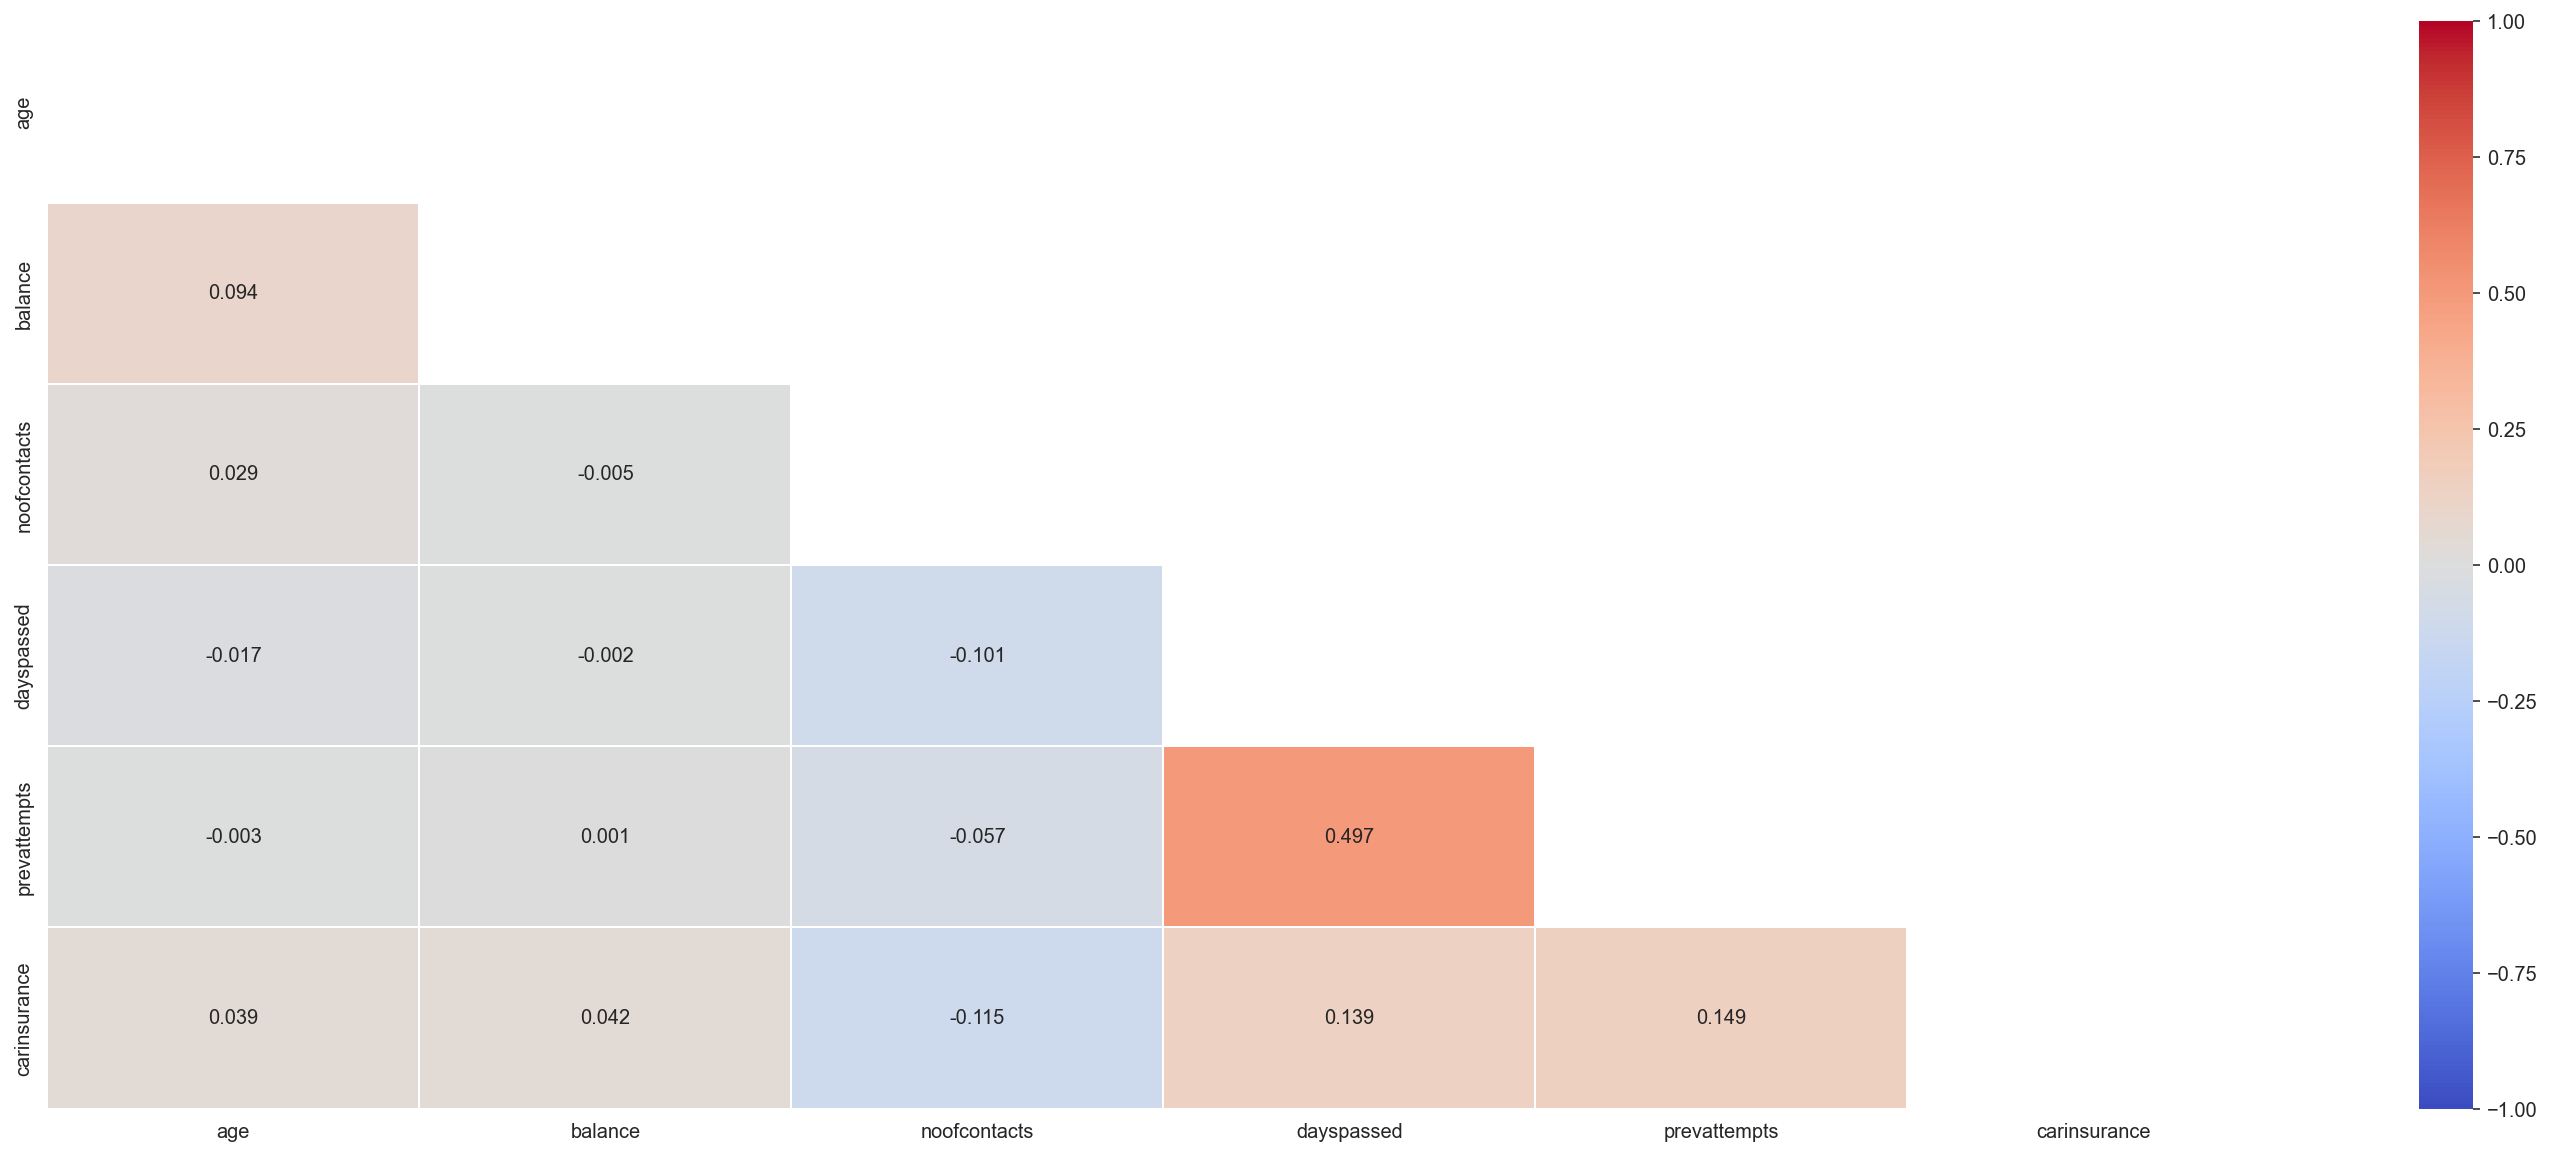

In [47]:
plt.figure(figsize=(25, 10))

corr_matrix = data[num_target].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix, 
                 mask=mask, 
                 xticklabels=corr_matrix.columns, 
                 yticklabels=corr_matrix.columns, 
                 annot=True,
                 fmt='.3f',
                 linewidths=.2, 
                 cmap='coolwarm', 
                 vmin=-1, vmax=1);

### Summary of Numerical Features Relationship

    - Overall, weak correlations between numerical features.
    - 'prevattempts' and 'dayspassed' features are moderately correlated. 
    - All numerical features have weak correlations with the target feature.

## Categorical Features

In [48]:
# Get categorical features
cat = data.drop('carinsurance', axis=1).select_dtypes(include='object').columns

In [49]:
# Look at the categorical features
data[cat].head()

job  marital education default hhinsurance carloan communication  \
0   management   single  tertiary       0           1       0     telephone   
1  blue-collar  married   primary       0           1       0           NaN   
2   management   single  tertiary       0           1       0      cellular   
3      student   single   primary       0           1       0      cellular   
4   management  married  tertiary       0           0       0      cellular   

  lastcontactday lastcontactmonth  outcome  
0             28              jan      NaN  
1             26              may      NaN  
2              3              jun  failure  
3             11              may      NaN  
4              3              jun      NaN

In [50]:
data[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job               3981 non-null   object
 1   marital           4000 non-null   object
 2   education         3831 non-null   object
 3   default           4000 non-null   object
 4   hhinsurance       4000 non-null   object
 5   carloan           4000 non-null   object
 6   communication     3098 non-null   object
 7   lastcontactday    4000 non-null   object
 8   lastcontactmonth  4000 non-null   object
 9   outcome           958 non-null    object
dtypes: object(10)
memory usage: 312.6+ KB


### Categorical Features Univariate Analysis

###### Unique Values

In [51]:
for feature in data[cat]:
    print(f'\n{feature} feature has {data[feature].nunique()} unique values.')
    print(f'{data[feature].unique()}\n')
    print('-' * 75)


job feature has 11 unique values.
['management' 'blue-collar' 'student' 'technician' 'admin.' 'services'
 'self-employed' 'retired' nan 'housemaid' 'entrepreneur' 'unemployed']

---------------------------------------------------------------------------

marital feature has 3 unique values.
['single' 'married' 'divorced']

---------------------------------------------------------------------------

education feature has 3 unique values.
['tertiary' 'primary' 'secondary' nan]

---------------------------------------------------------------------------

default feature has 2 unique values.
[0 1]

---------------------------------------------------------------------------

hhinsurance feature has 2 unique values.
[1 0]

---------------------------------------------------------------------------

carloan feature has 2 unique values.
[0 1]

---------------------------------------------------------------------------

communication feature has 2 unique values.
['telephone' nan 'cellular']

-

###### Distribution

In [52]:
data[cat].iplot(kind='hist', subplots=True, dimensions=(1000, 1000),
                title='<b>Histogram Distribution of Categorical Features<b>')


###### Statistical Summary

In [53]:
data[cat].describe().T.style.background_gradient(subset=['count', 'unique','freq'], cmap='RdPu')

### Summary of Categorical Features Univariate Analysis

    - The data contains 10 categorical features.
    - Categorical features are  missing values.
    - 'job': Most customers are in management (893) jobs followed closely by blue-collar (759) jobs.
    - 'martial': Most customers are married (2034), followed by customers who are single (1213), and then customers 
       who are divorced (483) are the least.
    - 'education': Majority of customers have secondary education (1988), followed by tertiary (1282) 
       and primary (561).
    - 'default': Majority of customers have not defaulted (3942), while only a small number of customers have
       defaulted (58).
    - 'hhinsurance': Rougly even split between customers who have house insurance (2029) and customer who do 
       not (1971).
    - 'carloan':Majority of customers do not have a car loan (3468), while the remaining do (532).
    - 'communication': Majority of customers were contacted via cellular (2831), while the remaining via 
       telephone (267).         
    - 'lastdaycontact': Hard to discern any real analysis from this feature. 
    - 'lastcontactmonth': Majority of customers were contact in May (1049), followed by Jul (573) and Aug (536).           - 'outcome': Most customers outcomes ended in failure (437), followed by success (326), and last other (195).

### Categorical Features Bivariate Analysis

###### Distribution

In [54]:
for value, feature in enumerate(data[cat]):
    fig = px.histogram(data[feature], color=data['carinsurance'], barmode='group', 
                       title=f'<b>{feature} by carinsurance<b>')
    fig.show()

###### Statistical Summary

In [55]:
print('\nStatistical summary of the categorical features by car insurance status:')
data.groupby('carinsurance')[cat].describe(exclude='number').T


Statistical summary of the categorical features by car insurance status:


carinsurance                       0           1
job              count          2386        1595
                 unique           11          11
                 top     blue-collar  management
                 freq            540         392
marital          count          2396        1604
                 unique            3           3
                 top         married     married
                 freq           1471         833
education        count          2306        1525
                 unique            3           3
                 top       secondary   secondary
                 freq           1258         730
default          count          2396        1604
                 unique            2           2
                 top               0           0
                 freq           2352        1590
hhinsurance      count          2396        1604
                 unique            2           2
                 top               1           0
                 freq           1380        1013
carloan          count          2396        1604
                 unique            2           2
                 top               0           0
                 freq           2016        1452
communication    count          1662        1436
                 unique            2           2
                 top        cellular    cellular
                 freq           1518        1313
lastcontactday   count          2396        1604
                 unique           31          31
                 top              18          12
                 freq            136          86
lastcontactmonth count          2396        1604
                 unique           12          12
                 top             may         may
                 freq            760         289
outcome          count           399         559
                 unique            3           3
                 top         failure     success
                 freq            261         291

###### CrossTabs

In [56]:
for i, col in enumerate(data[cat]):
    xtab = pd.crosstab(data[col], data['carinsurance'], normalize=True, margins=True)
    print()
    print(xtab * 100)
    print()
    print('-' * 75)


carinsurance           0          1         All
job                                            
admin.          6.882693   4.647074   11.529766
blue-collar    13.564431   5.501130   19.065561
entrepreneur    2.160261   0.879176    3.039437
housemaid       1.808591   0.929415    2.738006
management     12.584778   9.846772   22.431550
retired         2.587290   3.667420    6.254710
self-employed   2.160261   1.356443    3.516704
services        5.476011   2.813363    8.289375
student         1.105250   2.185381    3.290630
technician     10.198443   6.380306   16.578749
unemployed      1.406682   1.858829    3.265511
All            59.934690  40.065310  100.000000

---------------------------------------------------------------------------

carinsurance       0       1      All
marital                              
divorced       6.825   5.250   12.075
married       36.775  20.825   57.600
single        16.300  14.025   30.325
All           59.900  40.100  100.000

--------------------

### Summary of Categorical Features Bivariate Analysis

    - 'job': Most customers are in management (392) jobs followed closely by technician (759) jobs are more likely 
       to purchase car insurance compared to other customers in other jobs.
    - 'martial': Customers who are married are most likely to purchase car insurance.
    - 'education': Customers with a  secondary education are most likely to puchase car insurance. 
    - 'default': Customers who have not defaulted are most likely to purchase car insurance. This is not surprising 
       as most customers have not defualted.
    - 'hhinsurance': Customers without house insurance are most likely to purchase car insurance.
    - 'carloan': Customers without a car loan are most likely to purcahse car insurance. Not surprising as most
       customers do not have car loan.
    - 'communication': Customers contacted via cellular are most likely to purchase car insurance. Not surprising 
       as most customers have cellphones.      
    - 'lastdaycontact': Hard to discern any real analysis from this feature. 
    - 'lastcontactmonth': Customers contacted in May, Jun and Jul are most likely to purchase car insurance. 
    - 'outcome': Customers who responded successfully to previous campaigns are most likely to purchase 
       car insurance. 

# Data Preparation

In [57]:
data = raw_data.copy()
data.head()

Id  Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   1   32   management   single  tertiary        0     1218            1   
1   2   32  blue-collar  married   primary        0     1156            1   
2   3   29   management   single  tertiary        0      637            1   
3   4   25      student   single   primary        0      373            1   
4   5   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  CarInsurance  
0          -1             0      NaN  13:45:20  13:46:30             0  
1          -1             0      NaN  14:49:03  14:52:08             0  
2         119             1  failure  16:30:24  16:36:04             1  
3          -1             0      NaN  12:06:43  12:20:22             1  
4          -1             0      NaN  14:35:44  14:38:56             0

In [58]:
data.shape

(4000, 19)

In [59]:
data.columns = data.columns.str.lower()

### Feature Engineering

###### We seek to add new features to the data that are likely to have an impact on the probability of predicting customer purchase.

    1. First we will convert our date/time features 'callstart' and 'callend' to the correct dtype.
    2. Using date/time features, we'll engineer 3 new features:
             - 'callhourstart': The hour the call started. 
             - 'callminstart': The min the call started. 
             - 'callduration': The duration of the call in seconds. 

In [60]:
# Convert date/time features to data/time dtype
data['callstart'] = pd.to_datetime(data['callstart'])
data['callend'] = pd.to_datetime(data['callend'])

In [61]:
# Create three new date/time features
data['callduration'] = (data['callend'] - data['callstart']).dt.total_seconds()
data['callhourstart'] = data['callstart'].apply(lambda t: t.hour)
data['callminstart'] = data['callstart'].apply(lambda t: t.minute)

In [62]:
# Let's look at the new features created
data.head()

id  age          job  marital education  default  balance  hhinsurance  \
0   1   32   management   single  tertiary        0     1218            1   
1   2   32  blue-collar  married   primary        0     1156            1   
2   3   29   management   single  tertiary        0      637            1   
3   4   25      student   single   primary        0      373            1   
4   5   30   management  married  tertiary        0     2694            0   

   carloan communication  lastcontactday lastcontactmonth  noofcontacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   dayspassed  prevattempts  outcome           callstart             callend  \
0          -1             0      NaN 2021-12-17 13:45:20 2021-12-17 13:46:30   
1          -1             0      NaN 2021-12-17 14:49:03 2021-12-17 14:52:08   
2         119             1  failure 2021-12-17 16:30:24 2021-12-17 16:36:04   
3          -1             0      NaN 2021-12-17 12:06:43 2021-12-17 12:20:22   
4          -1             0      NaN 2021-12-17 14:35:44 2021-12-17 14:38:56   

   carinsurance  callduration  callhourstart  callminstart  
0             0          70.0             13            45  
1             0         185.0             14            49  
2             1         340.0             16            30  
3             1         819.0             12             6  
4             0         192.0             14            35

In [63]:
data.shape

(4000, 22)

### Split the data into train and test set

###### We'll separate the data into a train set and test set, getting 10% of the data for the test set.

In [64]:
train, test = train_test_split(data, test_size=.10, random_state=999)

# Save train and test set to csv
train.to_csv('../02-data/customer-purchase-insurance-trainingset.csv', index=False)
test.to_csv('../02-data/customer-purchase-insurance-testingset.csv', index=False)
print('\nThe train and test set were saved!\n')

print('The shape of the train set:', train.shape)
print('The shape of the test set:', test.shape)


The train and test set were saved!

The shape of the train set: (3600, 22)
The shape of the test set: (400, 22)


### Parition the train data into features (X) and target (y)

###### At first, we will not work with the date/time features we engineered. We will start off with modeling the original data to get a baseline score, then we will model with the new features we manually engineered, and compare the results.

In [65]:
feats_to_drop = ['id', 'callstart', 'callend', 'callduration', 'callhourstart', 'callminstart', 'carinsurance']

X = train.drop(feats_to_drop, axis=1)
y = train['carinsurance']
print('The shape of X:', X.shape)
print('The shape of y:', y.shape)

The shape of X: (3600, 15)
The shape of y: (3600,)


### Split into training and testing sets

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=999)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2880, 15) (720, 15)
(2880,) (720,)


##### Let's check that the target is stratified after splitting.

In [67]:
y_train.value_counts(normalize=True)

0    0.596528
1    0.403472
Name: carinsurance, dtype: float64

In [68]:
y_test.value_counts(normalize=True)

0    0.597222
1    0.402778
Name: carinsurance, dtype: float64

### Data Preprocessing

In [69]:
# Define numerical features preprocessing
standard_scaler = StandardScaler()
num_preprocessor = Pipeline([('scaling', standard_scaler)])

# Define categorical features preprocessing
constant_imputer = SimpleImputer(strategy='constant', fill_value='unknown', add_indicator=True)
ohe = OneHotEncoder(handle_unknown='ignore')
cat_preprocessor = Pipeline([('impute', constant_imputer), ('encode', ohe)])

# Combine numerical and categorical preprocessing
ct = ColumnTransformer([('numerical', num_preprocessor, selector(dtype_include='number')),
                        ('categorical', cat_preprocessor, selector(dtype_include='object'))])

In [70]:
ct

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('numerical',
                                 Pipeline(memory=None,
                                          steps=[('scaling',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True))],
                                          verbose=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x15f886040>),
                                ('categorical',
                                 Pipeline(memory=None,
                                          step...
                                                  SimpleImputer(add_indicator=True,
                                                                copy=True,
                                                                fill_value='unknown',
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0)),
                                                 ('encode',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True))],
                                          verbose=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x15f8867f0>)],
                  verbose=False, verbose_feature_names_out=True)

# Modeling

### Metric Selection

Note: The exact metric used and the threshold that our model needs to reach depends on the business need. We can tune the model to some extent to optimize for different metrics.

###### As we saw during EDA, the target feature 'carinsurance' is imbalanced. For an imbalanced classification problem, there are a number of metrics to consider. 

    We'll evaluate the model on:
        - ROC-AUC metric. 
        - Precision and Recall metrics on the test set.

### Model Selection

###### We will try the following models:
    
    1. Dummy Classifier
    2. Logistic Regression
    3. Support Vector Classifier
    4. KNeighbors Classifier
    5. AdaBoost Classifer
    6. ExtraTrees Classifer
    7. Random Forest Classifier
    8. Gradient Boosting Classifer
    9. History Gradient Boosting Classifier
    10. XGBoost Classifier

### Modeling with Default Parameters

In [71]:
%%time

# Define models
models = [DummyClassifier(strategy='constant', random_state=999, constant=1),
          LogisticRegression(solver='liblinear', random_state=999),
          SVC(random_state=999, probability=True),
          KNeighborsClassifier(),
          AdaBoostClassifier(random_state=999),
          ExtraTreesClassifier(random_state=999),
          RandomForestClassifier(random_state=999),
          GradientBoostingClassifier(random_state=999),
          HistGradientBoostingClassifier(random_state=999),
          XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=999)]


# Define Model Evaluation Strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

scores = []
model_name = ['Dummy', 'LR', 'SVC', 'KNN', 'ADA', 'ET', 'RF', 'GB', 'HGB', 'XGB']

for model in models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    
    # Compute model mean CV ROC-AUC score
    cv_scores = cross_val_score(pipe, X=X_train, y=y_train,
                                scoring=metric, cv=skfold, n_jobs=-1, error_score='raise').mean()
    
    # Fit model
    pipe.fit(X_train, y_train)
    
    # Predict model pipeline
    y_pred = pipe.predict(X_test)
    
    # Append model name and scores
    scores.append(({
        'CV ROC-AUC': round(cv_scores * 100, 3),
        'ROC-AUC': round(roc_auc_score(y_test, y_pred) * 100, 3),
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 3),
        'Precision': round(precision_score(y_test, y_pred) * 100, 3),
        'Recall': round(recall_score(y_test, y_pred) * 100, 3),
        'F1': round(f1_score(y_test, y_pred) * 100, 3)
    })) 
    
     # Display model result
    print(f'\nModel: {model}\n')
    print(f'Mean CV ROC-AUC Score:\n{cv_scores}\n')
    print(f'Test Scores:')
    print(f'ROC-AUC: {round(roc_auc_score(y_test, y_pred) * 100, 3)} | Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 3)} | Precision: {round(precision_score(y_test, y_pred) * 100, 3)} | Recall: {round(recall_score(y_test, y_pred) * 100, 3)} | F1: {round(f1_score(y_test, y_pred) * 100, 3)}\n')
    print('-' * 100)


Model: DummyClassifier(constant=1, random_state=999, strategy='constant')

Mean CV ROC-AUC Score:
0.5

Test Scores:
ROC-AUC: 50.0 | Accuracy: 40.278 | Precision: 40.278 | Recall: 100.0 | F1: 57.426

----------------------------------------------------------------------------------------------------

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=999, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Mean CV ROC-AUC Score:
0.73848281359343

Test Scores:
ROC-AUC: 68.268 | Accuracy: 72.222 | Precision: 73.936 | Recall: 47.931 | F1: 58.159

----------------------------------------------------------------------------------------------------

Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', de

In [72]:
model_results = pd.DataFrame(data=scores, columns=['CV ROC-AUC', 'ROC-AUC', 'Accuracy', 'Precision', 'Recall', 'F1'], 
                             index=model_name)

model_results.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
model_results

CV ROC-AUC  ROC-AUC  Accuracy  Precision   Recall      F1
GB         76.136   70.060    74.028     77.838   49.655  60.632
SVC        75.752   68.962    72.917     75.401   48.621  59.119
RF         75.681   69.407    72.778     72.596   52.069  60.643
HGB        74.948   69.575    72.778     71.963   53.103  61.111
ADA        74.590   67.803    71.667     72.396   47.931  57.676
ET         74.083   67.887    70.694     67.100   53.448  59.501
XGB        74.065   69.563    72.361     69.869   55.172  61.657
LR         73.848   68.268    72.222     73.936   47.931  58.159
KNN        71.181   65.000    67.917     62.771   50.000  55.662
Dummy      50.000   50.000    40.278     40.278  100.000  57.426

In [73]:
model_results['CV ROC-AUC'].iplot(kind='bar', 
                                  title='<b>Default Model Comparison by CV ROC-AUC<b>')

    - GB model achieves the best mean CV ROC-AUC score amongst all the models.

### Modeling default parameters with engineered date/time features.

### Parition the train data into features (X) and target (y)

###### Now we'll examine default modeling with the engineered date/time features we manually created.

In [74]:
feats_to_drop = ['id', 'callstart', 'callend', 'carinsurance']

X = train.drop(feats_to_drop, axis=1)
y = train['carinsurance']
print('The shape of X:', X.shape)
print('The shape of y:', y.shape)

The shape of X: (3600, 18)
The shape of y: (3600,)


### Split into training and testing sets

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=999)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2880, 18) (720, 18)
(2880,) (720,)


In [76]:
%%time

# Define models
models = [DummyClassifier(strategy='constant', random_state=999, constant=1),
          LogisticRegression(solver='liblinear', random_state=999),
          SVC(random_state=999, probability=True),
          KNeighborsClassifier(),
          AdaBoostClassifier(random_state=999),
          ExtraTreesClassifier(random_state=999),
          RandomForestClassifier(random_state=999),
          GradientBoostingClassifier(random_state=999),
          HistGradientBoostingClassifier(random_state=999),
          XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=999)]


# Define Model Evaluation Strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

scores2 = []
model_name = ['Dummy', 'LR', 'SVC', 'KNN', 'ADA', 'ET', 'RF', 'GB', 'HGB', 'XGB']

for model in models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    
    # Compute model mean CV ROC-AUC score
    cv_scores = cross_val_score(pipe, X=X_train, y=y_train,
                                scoring=metric, cv=skfold, n_jobs=-1, error_score='raise').mean()
    
    # Fit model
    pipe.fit(X_train, y_train)
    
    # Predict model pipeline
    y_pred = pipe.predict(X_test)
    
    # Append model name and scores
    scores2.append(({
        'CV ROC-AUC': round(cv_scores * 100, 3),
        'ROC-AUC': round(roc_auc_score(y_test, y_pred) * 100, 3),
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 3),
        'Precision': round(precision_score(y_test, y_pred) * 100, 3),
        'Recall': round(recall_score(y_test, y_pred) * 100, 3),
        'F1': round(f1_score(y_test, y_pred) * 100, 3)
    })) 
    
    # Display model result
    print(f'\nModel: {model}\n')
    print(f'Mean CV ROC-AUC Score:\n{cv_scores}\n')
    print(f'Test Scores:')
    print(f'ROC-AUC: {round(roc_auc_score(y_test, y_pred) * 100, 3)} | Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 3)} | Precision: {round(precision_score(y_test, y_pred) * 100, 3)} | Recall: {round(recall_score(y_test, y_pred) * 100, 3)} | F1: {round(f1_score(y_test, y_pred) * 100, 3)}\n')
    print('-' * 100)   


Model: DummyClassifier(constant=1, random_state=999, strategy='constant')

Mean CV ROC-AUC Score:
0.5

Test Scores:
ROC-AUC: 50.0 | Accuracy: 40.278 | Precision: 40.278 | Recall: 100.0 | F1: 57.426

----------------------------------------------------------------------------------------------------

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=999, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Mean CV ROC-AUC Score:
0.9106282618645622

Test Scores:
ROC-AUC: 79.82 | Accuracy: 81.528 | Precision: 80.784 | Recall: 71.034 | F1: 75.596

----------------------------------------------------------------------------------------------------

Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', d

In [77]:
fe_model_results = pd.DataFrame(data=scores2, columns=['CV ROC-AUC', 'ROC-AUC', 'Accuracy', 'Precision', 'Recall', 'F1'], 
                                index=model_name)

fe_model_results.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
fe_model_results

CV ROC-AUC  ROC-AUC  Accuracy  Precision   Recall      F1
HGB        92.127   81.520    82.083     77.288   78.621  77.949
XGB        92.116   82.735    83.333     79.110   79.655  79.381
GB         92.088   82.502    83.056     78.571   79.655  79.110
RF         91.718   82.326    82.778     77.852   80.000  78.912
SVC        91.432   82.570    83.472     80.427   77.931  79.159
LR         91.063   79.820    81.528     80.784   71.034  75.596
ADA        90.528   79.631    80.833     77.737   73.448  75.532
ET         89.683   78.837    80.556     79.297   70.000  74.359
KNN        84.793   76.700    78.472     76.265   67.586  71.664
Dummy      50.000   50.000    40.278     40.278  100.000  57.426

In [78]:
fe_model_results['CV ROC-AUC'].iplot(kind='bar',
                                     title='<b>Default Model Comparison by CV ROC-AUC<b>')

    - Adding the engineered data/time features gave a noticeable increase in all models quality!
    - HGB is the best model achieving the best mean CV ROC-AUC score amongst all models.

### Model Tuning

In [79]:
%%time

pipe = Pipeline([('preprocessing', ct), ('model', HistGradientBoostingClassifier(random_state=999))])
                     
y_pred = pipe.fit(X_train, y_train).predict(X_test)

print(f'Model Test Scores:')
print(f'ROC-AUC: {round(roc_auc_score(y_test, y_pred) * 100, 3)} | Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 3)} | Precision: {round(precision_score(y_test, y_pred) * 100, 3)} | Recall: {round(recall_score(y_test, y_pred) * 100, 3)} | F1: {round(f1_score(y_test, y_pred) * 100, 3)}\n')


cv_results = cross_val_score(pipe, X_train, y_train, scoring=metric, cv=skfold, n_jobs=-1, 
                             verbose=0, error_score='raise').mean()

print(f'Mean CV ROC-AUC Score: {cv_results}\n')
print('-'* 75)

Model Test Scores:
ROC-AUC: 81.52 | Accuracy: 82.083 | Precision: 77.288 | Recall: 78.621 | F1: 77.949

Mean CV ROC-AUC Score: 0.9212728815263495

---------------------------------------------------------------------------
CPU times: user 7.06 s, sys: 398 ms, total: 7.46 s
Wall time: 31.9 s


In [80]:
%%time

# Define model pipeline parameter grid
param_grid = {'model__max_iter': np.arange(100, 1001, 100),
              'model__max_depth': np.arange(1, 11),
              'model__learning_rate': [i/100 for i in np.arange(1, 21)]}


rs = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=10, scoring=metric, n_jobs=-1, cv=skfold, 
                        verbose=1, random_state=999, error_score='raise', return_train_score=True)

rs.fit(X_train, y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: user 6.83 s, sys: 217 ms, total: 7.04 s
Wall time: 19min 16s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessing',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numerical',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('scaling',
                                                                                                StandardScaler(copy=True,
                                                                                                               with_mean=...
                   param_distributions={'model__learning_rate': [0.01, 0.02,
                                                                 0.03, 0.04,
                                                                 0.05, 0.06,
                                                                 0.07, 0.08,
                                                                 0.09, 0.1,
                                                                 0.11, 0.12,
                                                                 0.13, 0.14,
                                                                 0.15, 0.16,
                                                                 0.17, 0.18,
                                                                 0.19, 0.2],
                                        'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'model__max_iter': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   pre_dispatch='2*n_jobs', random_state=999, refit=True,
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [81]:
y_pred = rs.best_estimator_.predict(X_test)
print(f'Model Test Scores:')
print(f'ROC-AUC: {round(roc_auc_score(y_test, y_pred) * 100, 3)} | Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 3)} | Precision: {round(precision_score(y_test, y_pred) * 100, 3)} | Recall: {round(recall_score(y_test, y_pred) * 100, 3)} | F1: {round(f1_score(y_test, y_pred) * 100, 3)}\n')

Model Test Scores:
ROC-AUC: 82.614 | Accuracy: 83.056 | Precision: 78.188 | Recall: 80.345 | F1: 79.252



In [82]:
print(f'Mean CV ROC-AUC Score: {rs.best_score_}')

Mean CV ROC-AUC Score: 0.9251814235707156


    - Tuning the HGB model, slightly increased the mean CV ROC-AUC from 92.127% to 92.518%

In [83]:
print(f'Best Model Parameters:\n{rs.best_params_}')

Best Model Parameters:
{'model__max_iter': 600, 'model__max_depth': 3, 'model__learning_rate': 0.03}


In [84]:
print(f'Best model found:')
best_model = rs.best_estimator_
best_model

Best model found:


Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('scaling',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15f7cec...
                 HistGradientBoostingClassifier(categorical_features=None,
                                                early_stopping='auto',
                                                l2_regularization=0.0,
                                                learning_rate=0.03, loss='auto',
                                                max_bins=255, max_depth=3,
                                                max_iter=600, max_leaf_nodes=31,
                                                min_samples_leaf=20,
                                                monotonic_cst=None,
                                                n_iter_no_change=10,
                                                random_state=999,
                                                scoring='loss', tol=1e-07,
                                                validation_fraction=0.1,
                                                verbose=0, warm_start=False))],
         verbose=False)

In [85]:
print('Model results:\n')
best_model_results = pd.DataFrame(rs.cv_results_).sort_values(by='rank_test_score', ascending=True)
best_model_results.head()

Model results:



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5      31.504528      0.302997         1.052020        0.034985   
8      22.418529      0.260615         1.295882        0.014464   
1     114.784827      3.913547         1.408963        0.029930   
3      52.135718      1.425304         0.342574        0.034826   
6     145.840578      3.737459         0.977301        0.024601   

  param_model__max_iter param_model__max_depth param_model__learning_rate  \
5                   600                      3                       0.03   
8                   800                      2                       0.03   
1                   900                      5                       0.04   
3                   200                      9                       0.05   
6                   600                      8                       0.05   

                                              params  split0_test_score  \
5  {'model__max_iter': 600, 'model__max_depth': 3...           0.935123   
8  {'model__max_iter': 800, 'model__max_depth': 2...           0.934423   
1  {'model__max_iter': 900, 'model__max_depth': 5...           0.926026   
3  {'model__max_iter': 200, 'model__max_depth': 9...           0.922327   
6  {'model__max_iter': 600, 'model__max_depth': 8...           0.917429   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
5           0.915829           0.939605           0.934844           0.927326   
8           0.915380           0.942662           0.929180           0.928428   
1           0.921527           0.940307           0.930383           0.929030   
3           0.919478           0.938703           0.929531           0.923667   
6           0.922227           0.937400           0.930132           0.924368   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
5           0.906325           0.942813           0.929531           0.903468   
8           0.908931           0.939856           0.921812           0.903468   
1           0.909332           0.926323           0.913292           0.892191   
3           0.909884           0.932789           0.916951           0.883119   
6           0.910535           0.926022           0.913643           0.889936   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  \
5           0.916951         0.925181        0.013103                1   
8           0.910385         0.923453        0.012903                2   
1           0.913292         0.920170        0.012873                3   
3           0.918955         0.919540        0.014471                4   
6           0.915748         0.918744        0.012282                5   

   split0_train_score  split1_train_score  split2_train_score  \
5            0.967158            0.969372            0.967802   
8            0.953712            0.953502            0.950852   
1            0.999965            0.999943            0.999873   
3            0.999030            0.998610            0.998581   
6            1.000000            1.000000            1.000000   

   split3_train_score  split4_train_score  split5_train_score  \
5            0.967541            0.969727            0.971063   
8            0.953758            0.954122            0.954900   
1            0.999883            0.999919            1.000000   
3            0.998080            0.998519            0.999082   
6            1.000000            1.000000            1.000000   

   split6_train_score  split7_train_score  split8_train_score  \
5            0.968298            0.967351            0.971435   
8            0.951031            0.949645            0.956035   
1            0.999904            0.999930            0.999982   
3            0.998714            0.998790            0.999319   
6            1.000000            1.000000            1.000000   

   split9_train_score  mean_train_score  std_train_score  
5            0.966812          0.96

In [86]:
cr = classification_report(y_test, y_pred)
print(f'Best Model Classification Report\n\n{cr}')

Best Model Classification Report

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       430
           1       0.78      0.80      0.79       290

    accuracy                           0.83       720
   macro avg       0.82      0.83      0.82       720
weighted avg       0.83      0.83      0.83       720



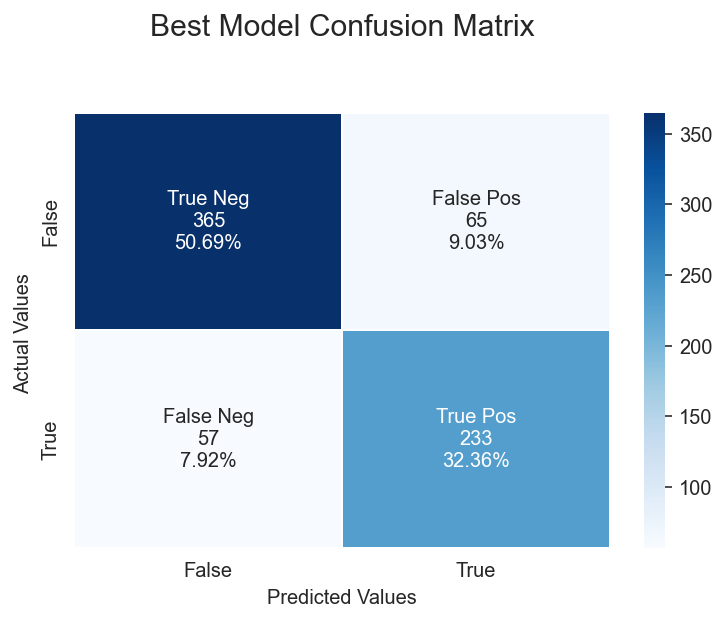

In [87]:
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_sum = ['{0:0.0F}'.format(value) for value in cm.flatten()]

group_percent = ['{0:.2%}'.format(value) for value in 
                 cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
         zip(group_names, group_sum, group_percent)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', linewidths=0.75, cmap='Blues')

ax.set_title('Best Model Confusion Matrix\n\n', size=15);
ax. set_xlabel("Predicted Values")
ax. set_ylabel('Actual Values ');
#
# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True']);

###### From the confusion matrix we can see that:

    - There are total of 365 + 65 = 430 actual customers that didn't puchase car insurance, and the model predicts 
      365 as not purchasing car insurance (correctly) and 65 as purchasing car insurance (incorrectly).
    - While there are 57 + 233 = 290 actual customers that did purchase car insurance, and the model predicts 57 as
      not purchasing car insurance (incorrectly) and 233 as purchasing car insurance (correctly).

### Summary of Best Model Results

In [88]:
best_model_result = pd.DataFrame(columns=['CV ROC-AUC', 'ROC-AUC', 'Accuracy', 'Precision', 'Recall', 'F1'], 
                                 index=['Tuned-HGB'])

best_model_result.loc['Tuned-HGB', 'CV ROC-AUC'] = round(rs.best_score_ * 100, 3) 
best_model_result.loc['Tuned-HGB', 'ROC-AUC'] = round(roc_auc_score(y_test, y_pred) * 100, 3)
best_model_result.loc['Tuned-HGB', 'Accuracy'] = round(accuracy_score(y_test, y_pred) * 100, 3)
best_model_result.loc['Tuned-HGB', 'Precision'] = round(precision_score(y_test, y_pred) * 100, 3)
best_model_result.loc['Tuned-HGB', 'Recall'] = round(recall_score(y_test, y_pred) * 100, 3)
best_model_result.loc['Tuned-HGB', 'F1'] = round(f1_score(y_test, y_pred) * 100, 3)
best_model_result

CV ROC-AUC ROC-AUC Accuracy Precision  Recall      F1
Tuned-HGB     92.518  82.614   83.056    78.188  80.345  79.252

# Conclusions

In [89]:
final_model_results = pd.concat([fe_model_results, best_model_result], axis=0)
final_model_results.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
final_model_results

CV ROC-AUC ROC-AUC Accuracy Precision  Recall      F1
Tuned-HGB     92.518  82.614   83.056    78.188  80.345  79.252
HGB           92.127   81.52   82.083    77.288  78.621  77.949
XGB           92.116  82.735   83.333     79.11  79.655  79.381
GB            92.088  82.502   83.056    78.571  79.655   79.11
RF            91.718  82.326   82.778    77.852    80.0  78.912
SVC           91.432   82.57   83.472    80.427  77.931  79.159
LR            91.063   79.82   81.528    80.784  71.034  75.596
ADA           90.528  79.631   80.833    77.737  73.448  75.532
ET            89.683  78.837   80.556    79.297    70.0  74.359
KNN           84.793    76.7   78.472    76.265  67.586  71.664
Dummy           50.0    50.0   40.278    40.278   100.0  57.426

In [90]:
final_model_results['CV ROC-AUC'].iplot(kind='bar',
                                        title='<b>Model Comparison by CV ROC-AUC<b>')

We have developed a resuable model pipeline, the optimized model is able to solve the business problem of predicting customer car insurance purchase with given parameters. The model can be deployed - used to make predictions on new data.

Our Approach:

    - We started out with a detailed exploratory data analysis of 
      the data, analyzing the descriptive and target features.
    - Next, we cleaned and prepared the data for machine learning
    - We carried our feature engineering, creating new features.
    - We split the data into training and testing sets
    - We compared and evaluated 8 different classifers, choosing the 
      best model and tuning its hyperparameters.
    - We settled on ROC-AUC metric to evaluate the model, as the 
      target variable is slightly imbalanced.
    - We inspected the best model predicitons on hold-out test set.

**From the review of the fitted models above, the best model, HGB (i.e. Tuned-HGB) achieved a mean CV ROC-AUC score of 92.518%. On the holdout test set, the best model achieves a 82.614% ROC-AUC, with a Precision score of 0.78188 on 1's, out of all customers that the model thinks will purchase car insurance, 78.188% actually do, and with a Recall score of 0.80345 on the 1's, the model is able to highlight 80.345% of those customers who will purchase car insurance.**


Note: The threshold that our model needs to reach depends on the business need. We can tune the model threshold to some extent to optimize for different metrics.

# Save Best Model

In [91]:
best_model

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('scaling',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15f7cec...
                 HistGradientBoostingClassifier(categorical_features=None,
                                                early_stopping='auto',
                                                l2_regularization=0.0,
                                                learning_rate=0.03, loss='auto',
                                                max_bins=255, max_depth=3,
                                                max_iter=600, max_leaf_nodes=31,
                                                min_samples_leaf=20,
                                                monotonic_cst=None,
                                                n_iter_no_change=10,
                                                random_state=999,
                                                scoring='loss', tol=1e-07,
                                                validation_fraction=0.1,
                                                verbose=0, warm_start=False))],
         verbose=False)

In [92]:
# Fit best model on all data
best_model.fit(X, y);

In [93]:
import joblib
joblib.dump(best_model, '../03-model/customer-purchase-insurance-bestmodel-hgb-v1.pkl', compress=1)
print('Best Model Saved!!')

Best Model Saved!!


# Deploy Model for Testing

###### Let's first load the model.

In [94]:
model = joblib.load('../03-model/customer-purchase-insurance-bestmodel-hgb-v1.pkl')
model

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('scaling',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15fc48a...
                 HistGradientBoostingClassifier(categorical_features=None,
                                                early_stopping='auto',
                                                l2_regularization=0.0,
                                                learning_rate=0.03, loss='auto',
                                                max_bins=255, max_depth=3,
                                                max_iter=600, max_leaf_nodes=31,
                                                min_samples_leaf=20,
                                                monotonic_cst=None,
                                                n_iter_no_change=10,
                                                random_state=999,
                                                scoring='loss', tol=1e-07,
                                                validation_fraction=0.1,
                                                verbose=0, warm_start=False))],
         verbose=False)

###### Now, we'll import the new data.

In [95]:
new_data = pd.read_csv('../02-data/customer-purchase-insurance-testingset.csv')
new_data.head()

id  age          job   marital  education  default  balance  hhinsurance  \
0  2146   44  blue-collar   married    primary        0        0            1   
1  3853   27   technician    single  secondary        0       90            0   
2  2313   34   management   married   tertiary        0      606            0   
3  1638   42   technician  divorced   tertiary        0       21            1   
4  1669   33   management   married   tertiary        0      148            0   

   carloan communication  lastcontactday lastcontactmonth  noofcontacts  \
0        0      cellular               6              may             1   
1        0      cellular               2              feb             3   
2        0      cellular              20              apr             1   
3        0           NaN              20              jun             7   
4        0           NaN              20              may             1   

   dayspassed  prevattempts outcome            callstart              callend  \
0          -1             0     NaN  2021-12-17 13:09:20  2021-12-17 13:09:37   
1          -1             0     NaN  2021-12-17 13:01:49  2021-12-17 13:03:11   
2          -1             0     NaN  2021-12-17 17:09:17  2021-12-17 17:10:54   
3          -1             0     NaN  2021-12-17 14:56:33  2021-12-17 14:56:42   
4          -1             0     NaN  2021-12-17 14:01:31  2021-12-17 14:13:28   

   carinsurance  callduration  callhourstart  callminstart  
0             0          17.0             13             9  
1             0          82.0             13             1  
2             1          97.0             17             9  
3             0           9.0             14            56  
4             0         717.0             14             1

In [96]:
new_data.shape

(400, 22)

In [97]:
X_new = new_data.drop(feats_to_drop, axis=1)
y_true = new_data['carinsurance']
print('The shape of X_new:', X_new.shape)
print('The shape of y_true:', y_true.shape)

The shape of X_new: (400, 18)
The shape of y_true: (400,)


###### Let make predictions with the model.

In [98]:
model_pred = best_model.predict(X_new)

###### We'll evaluate the predictions made by the model.

In [99]:
comparison = model_pred == y_true
np.unique(comparison, return_counts=True)

(array([False,  True]), array([ 61, 339]))

    - Out of 400, the model correctly predicted 339 (84.75%) predictions, while 61 (15.25%) predictions the 
      model incorrectly predicted.

In [100]:
cr = classification_report(y_test, y_pred)
print(f'Best Model Classification Report\n\n{cr}')

Best Model Classification Report

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       430
           1       0.78      0.80      0.79       290

    accuracy                           0.83       720
   macro avg       0.82      0.83      0.82       720
weighted avg       0.83      0.83      0.83       720



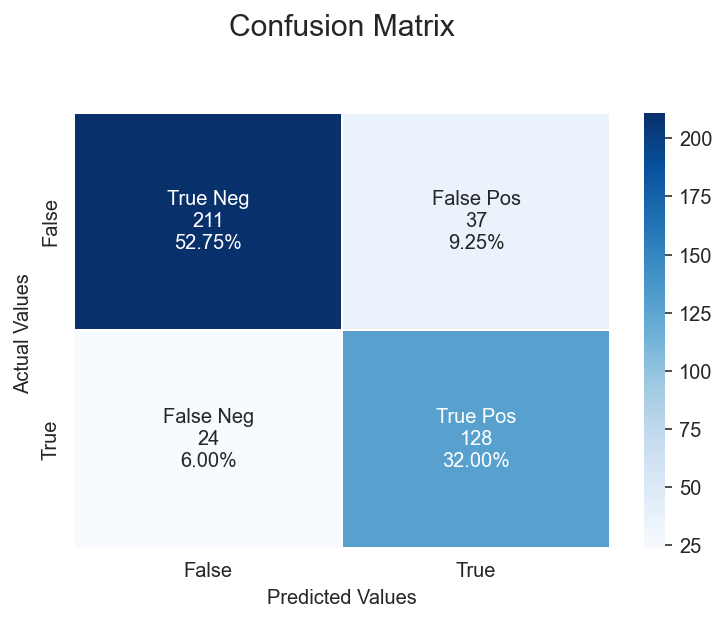

In [101]:
cm = confusion_matrix(y_true, model_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_sum = ['{0:0.0F}'.format(value) for value in cm.flatten()]

group_percent = ['{0:.2%}'.format(value) for value in 
                 cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
         zip(group_names, group_sum, group_percent)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', linewidths=0.75, cmap='Blues')

ax.set_title('Confusion Matrix\n\n', size=15);
ax. set_xlabel("Predicted Values")
ax. set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True']);

###### From the confusion matrix we can see that:

    - There are total of 211 + 37 = 248 actual customers that didn't puchase car insurance, and the model predicts 
      211 as not purchasing car insurance (correctly) and 37 as purchasing car insurance (incorrectly).
    - While there are 24 + 128 = 152 actual customers that did purchase car insurance, and the model predicts 24 as
      not purchasing car insurance (incorrectly) and 128 as purchasing car insurance (correctly).

###### Save model predictions

In [102]:
new_data['actualresults'] = y_true
new_data['modelresults'] = model_pred
new_data.head()

id  age          job   marital  education  default  balance  hhinsurance  \
0  2146   44  blue-collar   married    primary        0        0            1   
1  3853   27   technician    single  secondary        0       90            0   
2  2313   34   management   married   tertiary        0      606            0   
3  1638   42   technician  divorced   tertiary        0       21            1   
4  1669   33   management   married   tertiary        0      148            0   

   carloan communication  lastcontactday lastcontactmonth  noofcontacts  \
0        0      cellular               6              may             1   
1        0      cellular               2              feb             3   
2        0      cellular              20              apr             1   
3        0           NaN              20              jun             7   
4        0           NaN              20              may             1   

   dayspassed  prevattempts outcome            callstart              callend  \
0          -1             0     NaN  2021-12-17 13:09:20  2021-12-17 13:09:37   
1          -1             0     NaN  2021-12-17 13:01:49  2021-12-17 13:03:11   
2          -1             0     NaN  2021-12-17 17:09:17  2021-12-17 17:10:54   
3          -1             0     NaN  2021-12-17 14:56:33  2021-12-17 14:56:42   
4          -1             0     NaN  2021-12-17 14:01:31  2021-12-17 14:13:28   

   carinsurance  callduration  callhourstart  callminstart  actualresults  \
0             0          17.0             13             9              0   
1             0          82.0             13             1              0   
2             1          97.0             17             9              1   
3             0           9.0             14            56              0   
4             0         717.0             14             1              0   

   modelresults  
0             0  
1             0  
2             0  
3             0  
4             1

In [103]:
# Save model predictions to a csv
new_data.to_csv('../02-data/customer-purchase-insurance-testingset-predictions.csv', index=False)
print('Model predictions has been successfully saved to csv file!')

Model predictions has been successfully saved to csv file!


# Reproducibility

In [104]:
%watermark -a 'Rainier Goubault' -n -m -v -iv 

Author: Rainier Goubault

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

cufflinks : 0.17.3
pandas    : 1.3.4
seaborn   : 0.11.2
sklearn   : 1.0.1
json      : 2.0.9
scipy     : 1.7.3
matplotlib: 3.5.0
numpy     : 1.19.5
joblib    : 1.1.0
plotly    : 5.4.0

